In [ ]:
vimport pandas as pd

# Load the uploaded file
file_path = '/content/drive/MyDrive/Sim_FinalProject_FerryTraffic/Huyen/Final_Dataset/ archive1/Scotland.csv'
df = pd.read_csv(file_path)

# Remove the specified columns
columns_to_remove = ['TRAILER', 'BUS', 'TRUCK', 'PED/BYC']
cleaned_data = df.drop(columns=columns_to_remove, errors='ignore')

df



,Unnamed: 0.1,Unnamed: 0,Date,Weekday,Shift,Hour,TOTAL,TRAILER,BUS,TRUCK,PED/BYC,LOD,Clouds:,Precipitation:,Wind:,Temperature:,Holiday
0,0,0,2021-06-01,Tuesday,A,1:30,1.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN
1,1,42,2021-06-01,Tuesday,A,2:30,2.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN
2,2,30,2021-06-01,Tuesday,A,3:30,6.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN
3,3,31,2021-06-01,Tuesday,A,4:30,19.0,0,0,2,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN
4,4,32,2021-06-01,Tuesday,A,5:40,8.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61941,65335,65305,2024-08-31,Saturday,E,18:10,33.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Hot (> 80),NaN
61942,65336,65306,2024-08-31,Saturday,E,19:10,34.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Hot (> 80),NaN
61943,65337,65307,2024-08-31,Saturday,E,20:00,32.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Hot (> 80),NaN
61944,65338,65339,2024-08-31,Saturday,E,21:00,0.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Hot (> 80),NaN


In [ ]:
cloud_ranking_with_nan = {
    'Clear': 1,
    'Partly Cloudy': 2,
    'Overcast': 3,
    None: 0,
    float('nan'): 0  # Explicit handling of NaN
}

# Update the ranking column to handle NaN as 0
df['Clouds_Rank'] = df['Clouds:'].map(cloud_ranking_with_nan).fillna(0)

# Display the first few rows to verify the changes
df.head()


,Unnamed: 0.1,Unnamed: 0,Date,Weekday,Shift,Hour,TOTAL,TRAILER,BUS,TRUCK,PED/BYC,LOD,Clouds:,Precipitation:,Wind:,Temperature:,Holiday,Clouds_Rank
0,0,0,2021-06-01,Tuesday,A,1:30,1.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2
1,1,42,2021-06-01,Tuesday,A,2:30,2.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2
2,2,30,2021-06-01,Tuesday,A,3:30,6.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2
3,3,31,2021-06-01,Tuesday,A,4:30,19.0,0,0,2,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2
4,4,32,2021-06-01,Tuesday,A,5:40,8.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2


In [ ]:
# Retrieve all unique values from the 'Precipitation:' column for reference
unique_precipitation = df['Precipitation:'].unique()

# Define a ranking for the precipitation conditions
precipitation_ranking = {
    'None': 1,
    'Light Rain': 2,
    'Rain': 3,
    'Thunderstorms': 4,
    None: 0,
    float('nan'): 0
}

# Map the ranking to the column and handle NaN values
df['Precipitation_Rank'] = df['Precipitation:'].map(precipitation_ranking).fillna(0)

# Display the first few rows of the updated DataFrame for verification
df.head()


,Unnamed: 0.1,Unnamed: 0,Date,Weekday,Shift,Hour,TOTAL,TRAILER,BUS,TRUCK,PED/BYC,LOD,Clouds:,Precipitation:,Wind:,Temperature:,Holiday,Clouds_Rank,Precipitation_Rank
0,0,0,2021-06-01,Tuesday,A,1:30,1.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0
1,1,42,2021-06-01,Tuesday,A,2:30,2.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0
2,2,30,2021-06-01,Tuesday,A,3:30,6.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0
3,3,31,2021-06-01,Tuesday,A,4:30,19.0,0,0,2,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0
4,4,32,2021-06-01,Tuesday,A,5:40,8.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0


In [ ]:
# Define a ranking for the wind conditions
wind_ranking = {
    '0 - 10 mph': 5,
    '10 - 15 mph': 12.5,
    '15 - 20 mph': 17.5,
    '20 - 25 mph': 22.5,
    '25 - 30 mph': 27.5,
    '30 - 35 mph': 32.5,
    None: 0,
    float('nan'): 0  # Explicit handling of NaN
}

# Map the ranking to the column and handle NaN values
df['Wind_Rank'] = df['Wind:'].map(wind_ranking).fillna(0)

# Display the first few rows of the updated DataFrame for verification
df.head()


,Unnamed: 0.1,Unnamed: 0,Date,Weekday,Shift,Hour,TOTAL,TRAILER,BUS,TRUCK,PED/BYC,LOD,Clouds:,Precipitation:,Wind:,Temperature:,Holiday,Clouds_Rank,Precipitation_Rank,Wind_Rank
0,0,0,2021-06-01,Tuesday,A,1:30,1.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0
1,1,42,2021-06-01,Tuesday,A,2:30,2.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0
2,2,30,2021-06-01,Tuesday,A,3:30,6.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0
3,3,31,2021-06-01,Tuesday,A,4:30,19.0,0,0,2,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0
4,4,32,2021-06-01,Tuesday,A,5:40,8.0,0,0,0,0,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0


In [ ]:
# Define a ranking for the temperature conditions
temperature_ranking = {
    'Warm (60 - 80)': 60,
    'Hot (> 80)': 80,
    'Cool (40 - 60)': 40,
    'Cold (< 40)': 20,
    None: 0,
    float('nan'): 0
}

# Map the ranking to the column and handle NaN values
df['Temperature_Rank'] = df['Temperature:'].map(temperature_ranking).fillna(0)


df.head()


,Unnamed: 0.1,Unnamed: 0,Date,Weekday,Shift,Hour,TOTAL,TRAILER,BUS,TRUCK,...,LOD,Clouds:,Precipitation:,Wind:,Temperature:,Holiday,Clouds_Rank,Precipitation_Rank,Wind_Rank,Temperature_Rank
0,0,0,2021-06-01,Tuesday,A,1:30,1.0,0,0,0,...,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0,60
1,1,42,2021-06-01,Tuesday,A,2:30,2.0,0,0,0,...,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0,60
2,2,30,2021-06-01,Tuesday,A,3:30,6.0,0,0,0,...,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0,60
3,3,31,2021-06-01,Tuesday,A,4:30,19.0,0,0,2,...,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0,60
4,4,32,2021-06-01,Tuesday,A,5:40,8.0,0,0,0,...,0,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0,60


In [ ]:
# Convert the 'Holiday' column to binary: 0 for missing, 1 for any value
df['Holiday_Binary'] = df['Holiday'].notna().astype(int)

df.head()


,Unnamed: 0.1,Unnamed: 0,Date,Weekday,Shift,Hour,TOTAL,TRAILER,BUS,TRUCK,...,Clouds:,Precipitation:,Wind:,Temperature:,Holiday,Clouds_Rank,Precipitation_Rank,Wind_Rank,Temperature_Rank,Holiday_Binary
0,0,0,2021-06-01,Tuesday,A,1:30,1.0,0,0,0,...,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0,60,0
1,1,42,2021-06-01,Tuesday,A,2:30,2.0,0,0,0,...,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0,60,0
2,2,30,2021-06-01,Tuesday,A,3:30,6.0,0,0,0,...,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0,60,0
3,3,31,2021-06-01,Tuesday,A,4:30,19.0,0,0,2,...,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0,60,0
4,4,32,2021-06-01,Tuesday,A,5:40,8.0,0,0,0,...,Partly Cloudy,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0,60,0


In [ ]:
# Create a new column 'TOTAL_2' as the sum of 'TOTAL' and 'LOD'
df['TOTAL_2'] = df['TOTAL'] + df['LOD']

# Display the first few rows of the updated DataFrame for verification
df.head()


,Unnamed: 0.1,Unnamed: 0,Date,Weekday,Shift,Hour,TOTAL,TRAILER,BUS,TRUCK,...,Precipitation:,Wind:,Temperature:,Holiday,Clouds_Rank,Precipitation_Rank,Wind_Rank,Temperature_Rank,Holiday_Binary,TOTAL_2
0,0,0,2021-06-01,Tuesday,A,1:30,1.0,0,0,0,...,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0,60,0,1.0
1,1,42,2021-06-01,Tuesday,A,2:30,2.0,0,0,0,...,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0,60,0,2.0
2,2,30,2021-06-01,Tuesday,A,3:30,6.0,0,0,0,...,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0,60,0,6.0
3,3,31,2021-06-01,Tuesday,A,4:30,19.0,0,0,2,...,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0,60,0,19.0
4,4,32,2021-06-01,Tuesday,A,5:40,8.0,0,0,0,...,NaN,0 - 10 mph,Warm (60 - 80),NaN,2,0.0,5.0,60,0,8.0


In [ ]:
# # Remove the 'Shift' column from the DataFrame
# df = df.drop(columns=['Shift'], errors='ignore')

# # Display the first few rows of the updated DataFrame for verification
# df.head()


In [ ]:

# Convert time strings to floats
def time_to_float(time_str):
    if pd.isna(time_str):
        return None
    hours, minutes = map(int, time_str.split(':'))
    return hours + minutes / 60

df['Hour_float'] = df['Hour'].apply(time_to_float)



In [ ]:
# Sort the DataFrame by 'Date' and then by 'Hour_float' within each day
df = df.sort_values(by=['Date', 'Hour_float']).reset_index(drop=True)


In [ ]:
df[['Date', 'Shift', 'Hour', 'Hour_float']]


,Date,Shift,Hour,Hour_float
0,2021-06-01,D,00:30,0.5
1,2021-06-01,A,1:30,1.5
2,2021-06-01,A,2:30,2.5
3,2021-06-01,A,3:30,3.5
4,2021-06-01,A,4:30,4.5
...,...,...,...,...
61941,2024-08-31,E,21:00,21.0
61942,2024-08-31,D,21:30,21.5
61943,2024-08-31,E,22:00,22.0
61944,2024-08-31,D,22:30,22.5


In [ ]:
# Create a new column 'Previous LOD' that contains the 'LOD' value from the previous row
df['Previous LOD'] = df['LOD'].shift(1)

# Display the first few rows to verify the transformation
df[['Date', 'Hour_float', 'LOD', 'Previous LOD']]



,Date,Hour_float,LOD,Previous LOD
0,2021-06-01,0.5,0,NaN
1,2021-06-01,1.5,0,0.0
2,2021-06-01,2.5,0,0.0
3,2021-06-01,3.5,0,0.0
4,2021-06-01,4.5,0,0.0
...,...,...,...,...
61941,2024-08-31,21.0,0,0.0
61942,2024-08-31,21.5,0,0.0
61943,2024-08-31,22.0,0,0.0
61944,2024-08-31,22.5,0,0.0


In [ ]:
# List all columns in the DataFrame
df.columns.tolist()


['Unnamed: 0.1',
 'Unnamed: 0',
 'Date',
 'Weekday',
 'Shift',
 'Hour',
 'TOTAL',
 'TRAILER',
 'BUS',
 'TRUCK',
 'PED/BYC',
 'LOD',
 'Clouds:',
 'Precipitation:',
 'Wind:',
 'Temperature:',
 'Holiday',
 'Clouds_Rank',
 'Precipitation_Rank',
 'Wind_Rank',
 'Temperature_Rank',
 'Holiday_Binary',
 'TOTAL_2',
 'Hour_float',
 'Previous LOD']

In [ ]:
df_feature = df[['Date',
 'Weekday',
 'Clouds_Rank',
 'Precipitation_Rank',
 'Wind_Rank',
 'Temperature_Rank',
 'Holiday_Binary',
 'TOTAL_2',
 'Hour_float',
 'Previous LOD']]

In [ ]:
df_feature

,Date,Weekday,Clouds_Rank,Precipitation_Rank,Wind_Rank,Temperature_Rank,Holiday_Binary,TOTAL_2,Hour_float,Previous LOD
0,2021-06-01,Tuesday,2,0.0,5.0,60,0,8.0,0.5,NaN
1,2021-06-01,Tuesday,2,0.0,5.0,60,0,1.0,1.5,0.0
2,2021-06-01,Tuesday,2,0.0,5.0,60,0,2.0,2.5,0.0
3,2021-06-01,Tuesday,2,0.0,5.0,60,0,6.0,3.5,0.0
4,2021-06-01,Tuesday,2,0.0,5.0,60,0,19.0,4.5,0.0
...,...,...,...,...,...,...,...,...,...,...
61941,2024-08-31,Saturday,2,0.0,5.0,80,0,0.0,21.0,0.0
61942,2024-08-31,Saturday,2,0.0,5.0,80,0,53.0,21.5,0.0
61943,2024-08-31,Saturday,2,0.0,5.0,80,0,0.0,22.0,0.0
61944,2024-08-31,Saturday,2,0.0,5.0,80,0,35.0,22.5,0.0


In [ ]:
# Replace all NaN values in the DataFrame with 0
df_feature.fillna(0, inplace=True)

# Display the first few rows to verify the changes
df_feature.head()


<ipython-input-16-e01f9c3d9c05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feature.fillna(0, inplace=True)


,Date,Weekday,Clouds_Rank,Precipitation_Rank,Wind_Rank,Temperature_Rank,Holiday_Binary,TOTAL_2,Hour_float,Previous LOD
0,2021-06-01,Tuesday,2,0.0,5.0,60,0,8.0,0.5,0.0
1,2021-06-01,Tuesday,2,0.0,5.0,60,0,1.0,1.5,0.0
2,2021-06-01,Tuesday,2,0.0,5.0,60,0,2.0,2.5,0.0
3,2021-06-01,Tuesday,2,0.0,5.0,60,0,6.0,3.5,0.0
4,2021-06-01,Tuesday,2,0.0,5.0,60,0,19.0,4.5,0.0


In [ ]:
df_feature.to_csv('feature_clean.csv')

In [ ]:
data = df_feature

In [ ]:
data

,Date,Weekday,Clouds_Rank,Precipitation_Rank,Wind_Rank,Temperature_Rank,Holiday_Binary,TOTAL_2,Hour_float,Previous LOD
0,2021-06-01,Tuesday,2,0.0,5.0,60,0,8.0,0.5,0.0
1,2021-06-01,Tuesday,2,0.0,5.0,60,0,1.0,1.5,0.0
2,2021-06-01,Tuesday,2,0.0,5.0,60,0,2.0,2.5,0.0
3,2021-06-01,Tuesday,2,0.0,5.0,60,0,6.0,3.5,0.0
4,2021-06-01,Tuesday,2,0.0,5.0,60,0,19.0,4.5,0.0
...,...,...,...,...,...,...,...,...,...,...
61941,2024-08-31,Saturday,2,0.0,5.0,80,0,0.0,21.0,0.0
61942,2024-08-31,Saturday,2,0.0,5.0,80,0,53.0,21.5,0.0
61943,2024-08-31,Saturday,2,0.0,5.0,80,0,0.0,22.0,0.0
61944,2024-08-31,Saturday,2,0.0,5.0,80,0,35.0,22.5,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Drop irrelevant columns and prepare features/target
data_cleaned = data.drop([ 'Date'], axis=1)

# Handle categorical variables (e.g., Weekday)
data_encoded = pd.get_dummies(data_cleaned, columns=['Weekday'], drop_first=True)

# Separate features and target variable
X = data_encoded.drop('TOTAL_2', axis=1)
y = data_encoded['TOTAL_2']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

evaluation_metrics = {
    'RMSE': rmse,
    'MAE': mae,
    'R²': r2
}

evaluation_metrics


{'RMSE': 10.241537166828492,
 'MAE': 6.5551599898443245,
 'R²': 0.6848555083098857}

In [ ]:
import pandas as pd

# Ensure the Date column is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # 'coerce' will set invalid parsing as NaT

# Now extract components from the Date column
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Day_of_Year'] = data['Date'].dt.dayofyear
data['Week_of_Year'] = data['Date'].dt.isocalendar().week


<ipython-input-21-65d056c9921b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # 'coerce' will set invalid parsing as NaT
<ipython-input-21-65d056c9921b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Date'].dt.year
<ipython-input-21-65d056c9921b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [ ]:
data

,Date,Weekday,Clouds_Rank,Precipitation_Rank,Wind_Rank,Temperature_Rank,Holiday_Binary,TOTAL_2,Hour_float,Previous LOD,Year,Month,Day,Day_of_Year,Week_of_Year
0,2021-06-01,Tuesday,2,0.0,5.0,60,0,8.0,0.5,0.0,2021,6,1,152,22
1,2021-06-01,Tuesday,2,0.0,5.0,60,0,1.0,1.5,0.0,2021,6,1,152,22
2,2021-06-01,Tuesday,2,0.0,5.0,60,0,2.0,2.5,0.0,2021,6,1,152,22
3,2021-06-01,Tuesday,2,0.0,5.0,60,0,6.0,3.5,0.0,2021,6,1,152,22
4,2021-06-01,Tuesday,2,0.0,5.0,60,0,19.0,4.5,0.0,2021,6,1,152,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61941,2024-08-31,Saturday,2,0.0,5.0,80,0,0.0,21.0,0.0,2024,8,31,244,35
61942,2024-08-31,Saturday,2,0.0,5.0,80,0,53.0,21.5,0.0,2024,8,31,244,35
61943,2024-08-31,Saturday,2,0.0,5.0,80,0,0.0,22.0,0.0,2024,8,31,244,35
61944,2024-08-31,Saturday,2,0.0,5.0,80,0,35.0,22.5,0.0,2024,8,31,244,35


In [ ]:
# # Convert the Date column to datetime format
# data['Date'] = pd.to_datetime(data['Date'])

# # Extract components from the Date column
# data['Year'] = data['Date'].dt.year
# data['Month'] = data['Date'].dt.month
# data['Day'] = data['Date'].dt.day
# data['Day_of_Year'] = data['Date'].dt.dayofyear
# data['Week_of_Year'] = data['Date'].dt.isocalendar().week

# # # Drop the original Date column if needed for further processing
# # data_cleaned_with_date = data.drop(['Unnamed: 0'], axis=1)

# # Prepare the updated features and target variable
# data_encoded = pd.get_dummies(data, columns=['Weekday'], drop_first=True)
# X = data_encoded.drop('TOTAL_2', axis=1)
# y = data_encoded['TOTAL_2']

# # Re-split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Retrain the Random Forest model
# rf_model.fit(X_train, y_train)

# # Predict on the test set and re-evaluate
# y_pred = rf_model.predict(X_test)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# evaluation_metrics_with_date = {
#     'RMSE': rmse,
#     'MAE': mae,
#     'R²': r2
# }

# evaluation_metrics_with_date


In [ ]:
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
data = data.copy()

# Convert the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract components from the Date column
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Day_of_Year'] = data['Date'].dt.dayofyear
data['Week_of_Year'] = data['Date'].dt.isocalendar().week

# Drop the original Date column to avoid issues with datetime format
data_cleaned_with_date = data.drop(['Date'], axis=1)

# One-hot encode categorical variables (e.g., Weekday)
data_encoded = pd.get_dummies(data_cleaned_with_date, columns=['Weekday'], drop_first=True)

# Separate features and target variable
X = data_encoded.drop('TOTAL_2', axis=1)
y = data_encoded['TOTAL_2']

# Re-split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Retrain the Random Forest model
rf_model.fit(X_train, y_train)

# Predict on the test set and re-evaluate
y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

evaluation_metrics_cleaned = {
    'RMSE': rmse,
    'MAE': mae,
    'R²': r2
}

evaluation_metrics_cleaned


{'RMSE': 9.66468941690719, 'MAE': 6.044986439754809, 'R²': 0.7193563409085919}

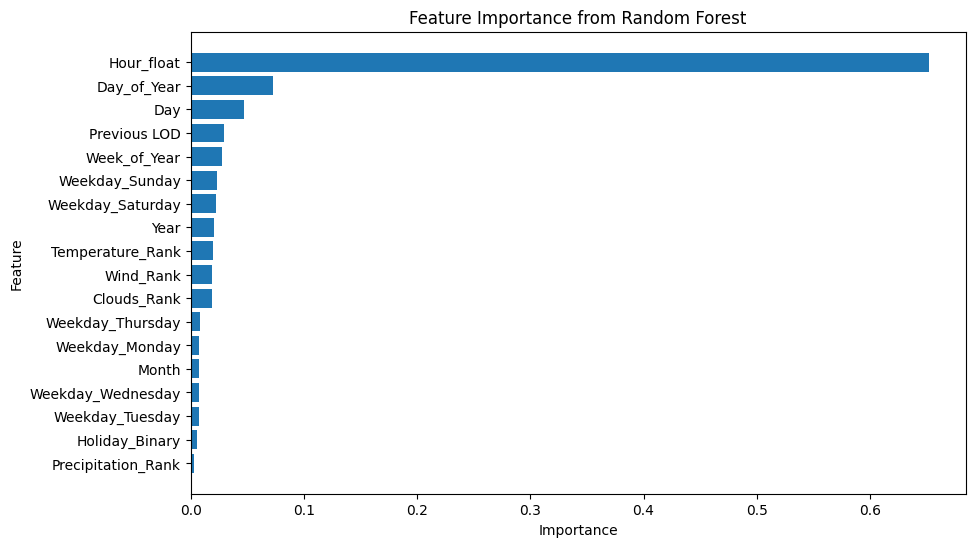

,Feature,Importance
0,Hour_float,0.651885
1,Day_of_Year,0.072632
2,Day,0.047467
3,Previous LOD,0.029193
4,Week_of_Year,0.027351
5,Weekday_Sunday,0.023368
6,Weekday_Saturday,0.022779
7,Year,0.020678
8,Temperature_Rank,0.019595
9,Wind_Rank,0.019257


In [ ]:
import matplotlib.pyplot as plt

# Extract feature importances from the model
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

importance_df.reset_index(drop=True)


In [ ]:
data_cleaned_with_date

,Weekday,Clouds_Rank,Precipitation_Rank,Wind_Rank,Temperature_Rank,Holiday_Binary,TOTAL_2,Hour_float,Previous LOD,Year,Month,Day,Day_of_Year,Week_of_Year
0,Tuesday,2,0.0,5.0,60,0,8.0,0.5,0.0,2021,6,1,152,22
1,Tuesday,2,0.0,5.0,60,0,1.0,1.5,0.0,2021,6,1,152,22
2,Tuesday,2,0.0,5.0,60,0,2.0,2.5,0.0,2021,6,1,152,22
3,Tuesday,2,0.0,5.0,60,0,6.0,3.5,0.0,2021,6,1,152,22
4,Tuesday,2,0.0,5.0,60,0,19.0,4.5,0.0,2021,6,1,152,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61941,Saturday,2,0.0,5.0,80,0,0.0,21.0,0.0,2024,8,31,244,35
61942,Saturday,2,0.0,5.0,80,0,53.0,21.5,0.0,2024,8,31,244,35
61943,Saturday,2,0.0,5.0,80,0,0.0,22.0,0.0,2024,8,31,244,35
61944,Saturday,2,0.0,5.0,80,0,35.0,22.5,0.0,2024,8,31,244,35


In [ ]:
data_cleaned_with_date.to_csv('/content/drive/MyDrive/Sim_FinalProject_FerryTraffic/Huyen/Final_Dataset/Scotland.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
